In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('/Users/young/dataset_local/mnist_train.csv')
test = pd.read_csv('/Users/young/dataset_local/mnist_test.csv')


In [47]:
X_train = np.array(train.iloc[:,1:])
y_train = np.array(train.iloc[:,0])
X_test = np.array(test.iloc[:,1:])
y_test = np.array(test.iloc[:,0])

In [13]:
X_train.shape

(60000, 784)

In [14]:
def pca_decomposition(data,n):
    pca = PCA(n_components=n)
    pca.fit_transform(data)
    return np.sum(pca.explained_variance_ratio_)

pca_decomposition(X_train,45)

0.8071248661357199

In [32]:
pipe = Pipeline(steps=[
    ('pca',PCA()),
    ('clf',KNeighborsClassifier())
])

parameters = {
    'pca__n_components' : [10,20,50],
    'clf__n_neighbors' : [5,10,15,30]
}

kfold = StratifiedKFold(random_state=13,n_splits=5,shuffle=True)
grids = GridSearchCV(pipe,param_grid=parameters,cv=kfold,n_jobs=-1,verbose=1)


In [33]:
grids.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15, 30],
                         'pca__n_components': [10, 20, 50]},
             verbose=1)

In [35]:
grids_best = grids.best_estimator_
grids_best.fit(X_train,y_train)
pred = grids_best.predict(X_test)
accuracy_score(y_test,pred)

0.9747

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



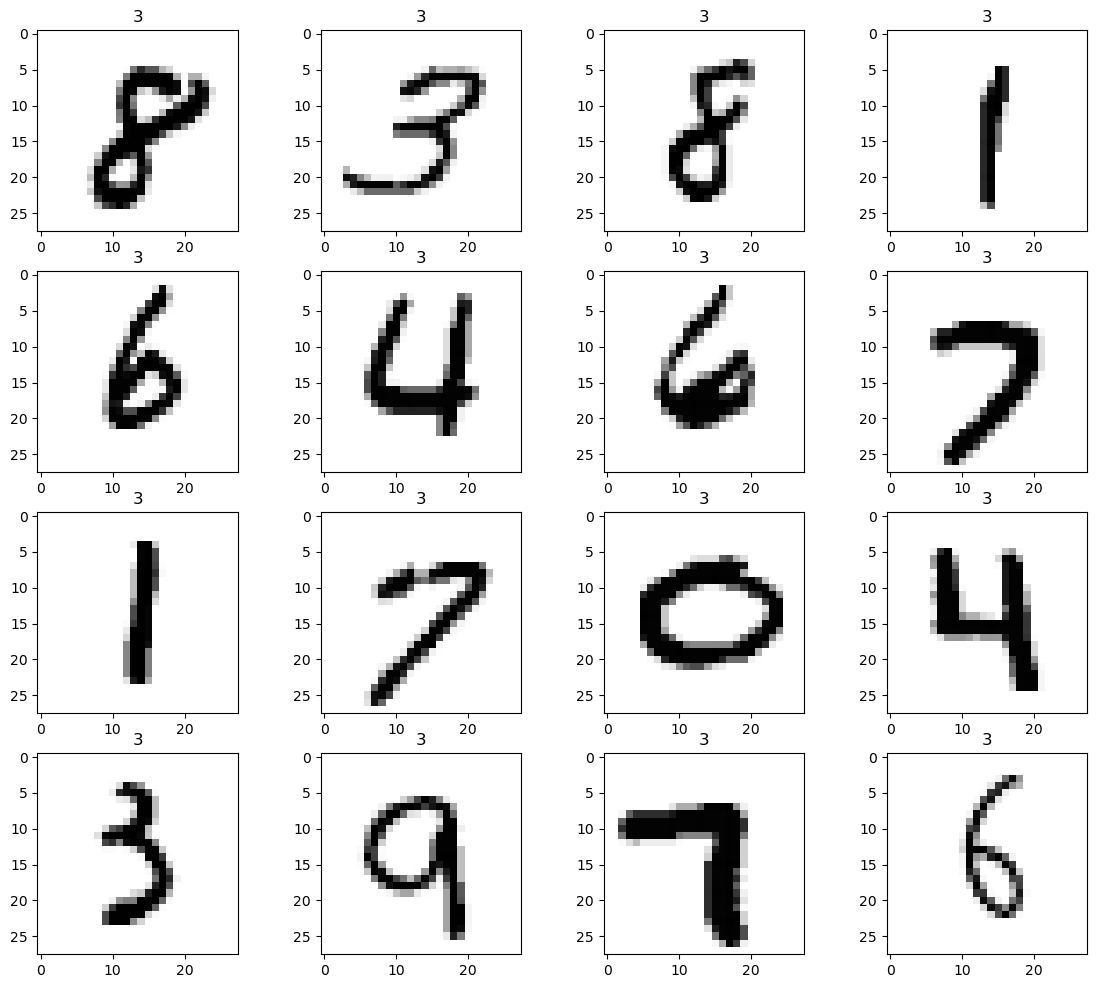

In [60]:
import random
samples = random.choices(population=range(0,60000),k=16)

plt.figure(figsize=(14,12))
for idx,d in enumerate(samples):
    # print(idx,d)
    plt.subplot(4,4,idx+1)
    plt.imshow(X_train[d].reshape(28,28),cmap='Greys',interpolation='nearest')
    plt.title(y_train[n])

plt.show()

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have vali

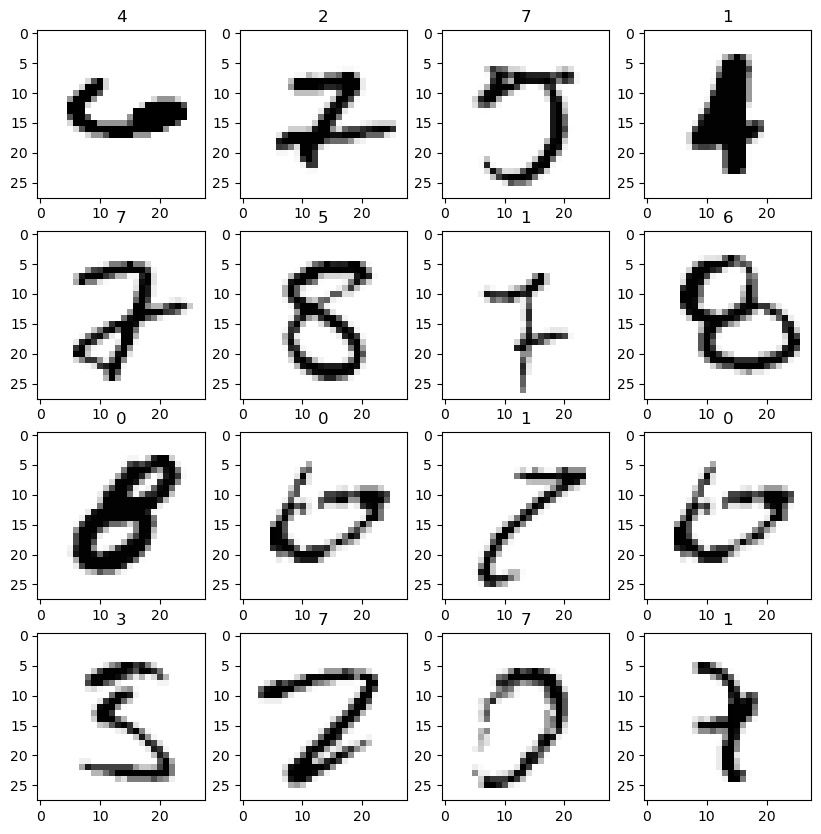

In [97]:
wrong_result = X_test[y_test != pred]
wrong_result.shape[0]
samples = random.choices(population=range(0,wrong_result.shape[0]),k=16)

plt.figure(figsize=(10,10))
for idx,n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(wrong_result[n].reshape(28,28),cmap='Greys',interpolation='nearest')
    plt.title(grids.best_estimator_.predict(wrong_result[n].reshape(1,784))[0])

plt.show();


(253, 784)